# Quantum States

In this tutorial, we will learn how to build, visualize, and measure states.

First, we will import the libraries.

In [17]:
import quforge.quforge as qf
import quforge.statevector as sv
from IPython.display import Math
import matplotlib.pyplot as plt

To create a state, we must pass the string corresponding to this state.

For instance, if we want to create the qubit $|0\rangle$, then we use:

In [3]:
state = qf.State('0')

We can print the state directly to see its corresponding state vector:

In [4]:
print(state)

tensor([[1.+0.j],
        [0.+0.j]])


Or, we can use the print function from QuForge to visualize the state in latex form:

In [5]:
Math(sv.show(state))

<IPython.core.display.Math object>

We must pass the amplitudes multiplying the corresponding states to create a quantum superposition.

For instance, if we want to create $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$:

In [11]:
state = (2**-0.5)*(qf.State('0') + qf.State('1'))
Math(sv.show(state))

<IPython.core.display.Math object>

To create a multi-qubit state, we must pass the corresponding string separated by hyphens.

For instance, if we want to create the state $\sqrt{0.75}|001\rangle - \sqrt{0.25}|100\rangle$:

In [10]:
state = (0.75**0.5)*qf.State('0-0-1') - (0.25**0.5)*qf.State('1-0-0')
Math(sv.show(state, wires=3))

<IPython.core.display.Math object>

We need to specify the dimension we are working with for a qudit system.

If all qudits have the same dimension, we can use:

In [13]:
state = (0.25**0.5)*qf.State('1-2', dim=4) + (0.75**0.5)*qf.State('0-3', dim=4)
Math(sv.show(state, dim=4, wires=2))

<IPython.core.display.Math object>

If we have qudits with multiple dimensions, we pass a list of the corresponding dimensions in their respective order.

For instance, if the first qudit has dimension four and the second qudit has dimension two, then we use:

In [14]:
state = (0.5**0.5)*qf.State('3-0', dim=[4,2]) + (0.5**0.5)*qf.State('3-1', dim=[4,2])
Math(sv.show(state, dim=[4,2], wires=2))

<IPython.core.display.Math object>

The show function from QuForge has numerous flags that allow users more control over visualizing the states.

For instance, we can use the flag 'use_floats' to convert the amplitudes into a float notation:

In [16]:
state = -(0.4**0.5)*qf.State('3-0', dim=[4,2]) + (0.6**0.5)*qf.State('3-1', dim=[4,2])
Math(sv.show(state, dim=[4,2], wires=2, use_floats=True))

<IPython.core.display.Math object>

If we want to measure a state, we can use the measurement function. This function returns the histogram and the probability distribution of the state. Note that we need to specify which qudits we want to measure.

In [31]:
dim = 3
state = (0.5**0.5)*qf.State('0-0',dim=dim) + (0.3**0.5)*qf.State('1-1',dim=dim) + (0.2**0.5)*qf.State('2-2',dim=dim)

histogram, distribution = sv.measure(state, dim=dim, wires=2, index=[0,1], shots=10000)
print('Histogram:')
print(histogram)
print('\n')
print('Probability distribution')
print(distribution)

Histogram:
{'00': 5008, '01': 0, '02': 0, '10': 0, '11': 3018, '12': 0, '20': 0, '21': 0, '22': 1974}


Probability distribution
tensor([0.5000, 0.0000, 0.0000, 0.0000, 0.3000, 0.0000, 0.0000, 0.0000, 0.2000])


<BarContainer object of 9 artists>

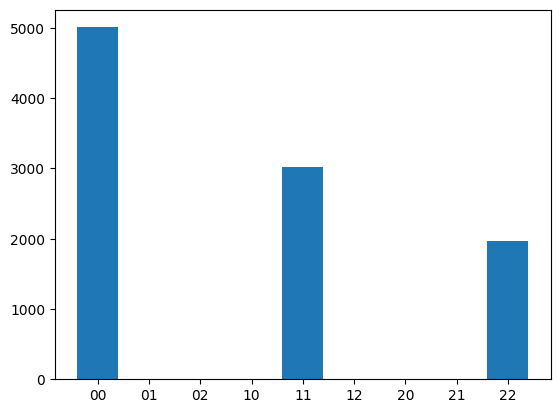

In [32]:
keys = list(histogram.keys())
values = list(histogram.values())
plt.bar(keys, values)